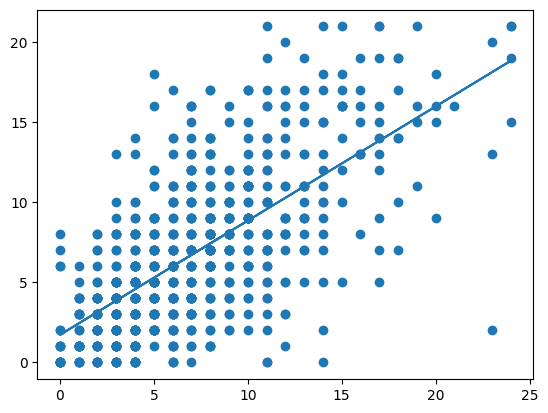



We are evaluating depression_anxiety_data.csv do you want:

1.	Print data in Terminal
2.	Get output for specific user
3.	Write it to another CSV file



In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[44]:


import csv
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

x=[]
df=pd.read_csv("depression_anxiety_data.csv")
x=df["phq_score"]
y=df["gad_score"]


# In[45]:


slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()


# In[ ]:


import csv

#flag to skip first line as it contains all content names
flag=0
flag_choice_2=0
print("\n\nWe are evaluating depression_anxiety_data.csv do you want:\n\n1.\tPrint data in Terminal\n2.\tGet output for specific user\n3.\tWrite it to another CSV file\n")

while True:
    choice = int(input("Choice:\t"))
    if(choice == 1 or choice == 3):
        break
    if(choice==2):
       id_check = int(input("ID:\t"))
       break
    else:
        print("Invalid choice, please try again.\t")

with open('report.csv', 'a', newline='') as csvfile:
    fieldnames = ['ID', 'Depression percent', 'Anxiety percent', 'Depression and Anxiety percent']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
qd=[]
qa=[]
# Open file
with open('depression_anxiety_data.csv') as file_obj:
    # Skips the heading
    # Using next() method
    heading = next(file_obj)

    # Create reader object by passing the file
    # object to reader method
    reader_obj = csv.reader(file_obj)

    # Iterate over each row in the csv file
    # using reader object
    for row in reader_obj:
        if(flag ==0):
            flag=1
            continue

        #The PHQ-9 total score ranges from 0 to 27
        #scores of 5–9 are classified as mild depression;
        #10–14 as moderate depression; 15–19 as moderately severe depression;
        #≥ 20 as severe depression

        #A score of
        #10–13 is regarded as mild depression,
        #14–17 as mild to moderate depression,
        #and >17 as moderate to severe depression

        phq_score=int(row[6])

        #converting the phq_scor to 75% to sum up as we mentioned above
        phq_score_percent=phq_score*75/25

        if(row[17]=='NA'):
            continue
        epworth_score=int(row[17])
        depp=row[9]
        if(depp== False):
            sucidal_percent=0
        else:
            sucidal_percent=5

        # 3 variables:
        #   PHQ,    epworth_score     suicidal
        #   75%     20%               5%           =    100%

        #summing up phq_score_percent, epworth_score and sucidal_percent to get depression_percent
        depression_percent = phq_score_percent + epworth_score + sucidal_percent
        qd.append(depression_percent)
        gad_score=int(row[12])

        #converting the gad_score to 80% to sum up as we mentioned above
        gad_score_percent=gad_score*80/21

        #The GAD-7 scores were also represented with clinical categorizations of anxiety levels as follows:
        #GAD-7 score of 0–4 (none)
        #5–9 (mild)
        #10–14 (moderate)
        #15–21 (severe)

        anxiety_treatment=row[16]

        #flag for overcomming the below condition
        anxiety_treatment_percent=10

        if(anxiety_treatment=='TRUE'):
            anxiety_treatment_percent=0

        if(anxiety_treatment=='FALSE' and anxiety_treatment_percent!=0):
            anxiety_treatment_percent=15

        else:
            anxiety_treatment_percent=7.5

        #summing up anxiety_treatment_percent, gad_score_percent and sucidal_percent to get anxiety_percent
        anxiety_percent = anxiety_treatment_percent + gad_score_percent + sucidal_percent
        #print("Details for patient ID " +row[0]+":")
        qa.append(anxiety_percent)

        depression__anxiety_percent=(depression_percent+anxiety_percent)/2
        if(choice == 1):
            #Printing in the format
            #-------------------------------------------------
            #| Details for patient ID:               xx      |
            #|                                               |
            #| Depression percent:                   xx.xx   |
            #| Anxiety percent:                      xx.xx   |
            #| Depression and Anxiety percent:       xx.xx   |
            #-------------------------------------------------
            print("-------------------------------------------------")
            print("| Details for patient ID:\t\t" +row[0]+"\t|")
            print("| \t\t\t\t\t\t|")
            print("| Depression percent:\t\t\t"+str(round(depression_percent,2))+"\t|")
            print("| Anxiety percent:\t\t\t"+str(round(anxiety_percent,2))+"\t|")

            # calculating depression__anxiety_percent by averaging depression_percent and anxiety_percent
            print("| Depression and Anxiety percent:\t"+ str(round(depression__anxiety_percent,2))+"\t|")
            print("-------------------------------------------------\n")
        if(choice == 3):
            #Writing it to the file
            with open('report.csv', 'a', newline='') as csvfile:
                writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
                writer.writerow({'ID': row[0], 'Depression percent': round(depression_percent,2),'Anxiety percent': round(anxiety_percent,2),'Depression and Anxiety percent': round(depression__anxiety_percent,2)})
                csvfile.close()
        if(choice == 2 and int(row[0])==id_check):
            print("\n\n-------------------------------------------------")
            print("| Details for patient ID:\t\t" +row[0]+"\t|")
            print("| \t\t\t\t\t\t|")
            print("| Depression percent:\t\t\t"+str(round(depression_percent,2))+"\t|")
            print("| Anxiety percent:\t\t\t"+str(round(anxiety_percent,2))+"\t|")

            # calculating depression__anxiety_percent by averaging depression_percent and anxiety_percent
            print("| Depression and Anxiety percent:\t"+ str(round(depression__anxiety_percent,2))+"\t|")
            print("-------------------------------------------------\n")
            flag_choice_2=1
        else:
            continue



# In[49]:


slope, intercept, r, p, std_err = stats.linregress(qd, qa)

def myfunc(qd):
  return slope * qd + intercept

mymodel = list(map(myfunc, qd))

plt.scatter(qd, qa)
plt.plot(qd, mymodel)
plt.show()


# In[ ]:




